### Introduction and initial data wrangling

Hi! The purpose of this notebook is to show my thought process (chaotic at times -- especially towards the end, due to the time limit ;)). The main goal was to create a model which would predict, based off a set of personal stats, whether they'd graduate or not. I have some issues with that approach but I'm going to address those at the end.


To the datamobile!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
candidates = pd.read_csv('data/score_board.csv')

In [3]:
candidates.head()

,id,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,accepted
0,CS-1980-00001,1980,1.674275,0.082557,0.084508,0.008007,4,0.091328,0.012596,276,False
1,CS-1980-00002,1980,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,True
2,CS-1980-00003,1980,1.500251,0.075756,0.002541,0.216737,3,0.008463,0.001737,276,False
3,CS-1980-00004,1980,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,True
4,CS-1980-00005,1980,2.884417,0.396614,0.478490,0.180828,3,0.638742,0.182141,554,False


In [4]:
graduates = pd.read_csv('data/graduates.csv')

In [5]:
graduates.head()

,id,graduated
0,CS-1980-00002,False
1,CS-1980-00004,True
2,CS-1980-00007,True
3,CS-1980-00008,False
4,CS-1980-00012,True


In [6]:
students = pd.merge(candidates, graduates, on='id')
students = students.drop(['accepted', 'id'], axis=1)

In [7]:
students.head()

,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,graduated
0,1980,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,False
1,1980,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,True
2,1980,2.897191,0.718591,0.941583,0.489207,4,0.980957,0.912487,811,True
3,1980,3.948450,0.953325,0.981074,0.914729,1,0.999489,0.997138,875,False
4,1980,3.939870,0.452506,0.952712,0.974585,4,0.940924,0.973076,790,True


Let's see if there are any null values:

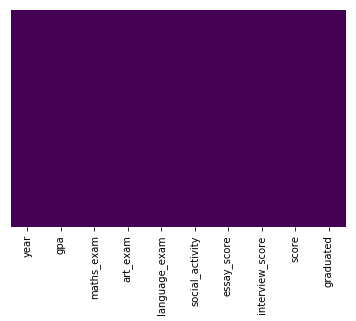

In [8]:
sns.heatmap(students.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There are none. There might be some nonsense values, though, so let's double check with .info() and .describe().

In [9]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009 entries, 0 to 7008
Data columns (total 10 columns):
year               7009 non-null int64
gpa                7009 non-null float64
maths_exam         7009 non-null float64
art_exam           7009 non-null float64
language_exam      7009 non-null float64
social_activity    7009 non-null int64
essay_score        7009 non-null float64
interview_score    7009 non-null float64
score              7009 non-null int64
graduated          7009 non-null bool
dtypes: bool(1), float64(6), int64(3)
memory usage: 554.4 KB


All the values are either numeric (great!) or Boolean (so they can be easily ported to numeric). The id object shouldn't, obviously, have any effect on the student status -- it's just a means of identification.

In [10]:
students.describe()

,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score
count,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000
mean,1998.801684,3.594377,0.851056,0.815081,0.814123,3.000143,0.934669,0.936532,853.515623
std,10.913043,0.329060,0.192624,0.224290,0.227928,1.421410,0.130732,0.131171,105.485478
min,1980.000000,1.850764,0.009699,0.002378,0.005865,1.000000,0.002230,0.004825,561.000000
25%,1989.000000,3.420754,0.801365,0.739754,0.733354,2.000000,0.941314,0.944835,783.000000
50%,1999.000000,3.676011,0.931921,0.912559,0.916296,3.000000,0.985999,0.986613,839.000000
75%,2008.000000,3.847615,0.979433,0.975063,0.976982,4.000000,0.996801,0.997046,925.000000
max,2016.000000,3.999989,0.999921,0.999858,0.999942,5.000000,0.999996,0.999996,1115.000000


A few observations based off this summary:
1. There don't seem to be any nonsensical (out of boundary values). It seems like it's a nice, clean data set.
2. The recruitment years span the 1980 - 2016 period. It would make sense to divide the students based off the recruitment year and see how each group performed since the exam difficulty may vary for each cohort.
3. The 25% percentile for both the essay score and the interview score fall above the 94% grade mark. This might suggest that the human evaluators are pretty lenient (is every candidate really that good?) and those scores alone might not be too helpful in my predictions, or it might be better to transform them using a binary threshold (below/above average result).
4. The average social activity score is three and the standard deviation for it is pretty big (1.42 on a 1-5 scale).

### Data visualization
This section presents a few graphs I found useful when trying to understand the data. There's also an accompanying Shiny app -- this part took me way longer than I anticipated, as my Seaborn- and Matplotlib-fu is still weak (compared to how fast I can create those graphs with R + ggplot).

Let's start by seeing how many people graduated (total).

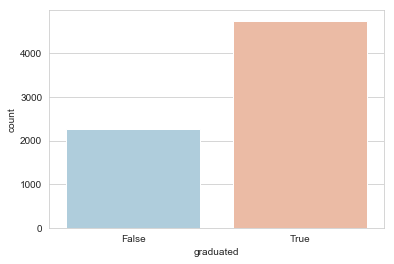

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='graduated', data=students, palette='RdBu_r')

This means that about 1 in 3 students has dropped out. There's no info about at what point they dropped out but from the fiscal point of view that sounds like a lot.

Do the scores follow a normal distribution?

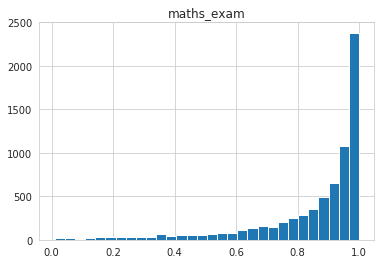

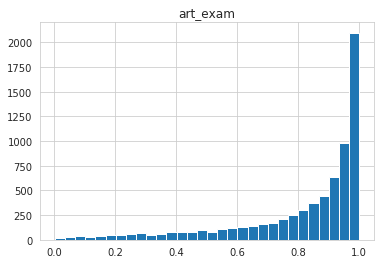

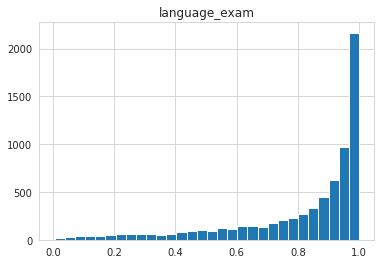

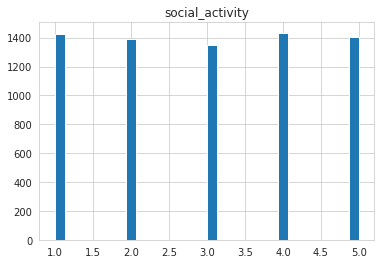

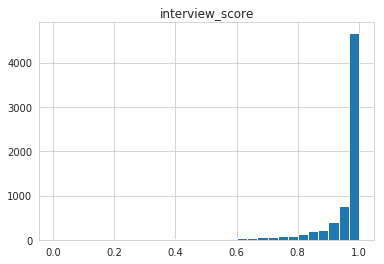

In [12]:
colnames = list(students.columns.values)[2:-2]
del colnames[4] # take only the column names for the scores

for index, col in enumerate(colnames):
    fig = plt.figure(figsize=(6,4))
    students[col].hist(bins=30)
    plt.title(col)
    plt.show()
    print('\n')

All but the total score and social-activity score are left-skewed. The total score looks more like a normal distribution, which is expected: if it was left-skewed as well it would mean most passing candidates were great at everything, and unicorns are rare. The social activity score looks fairly even, which seems good (it would seems suspicious if most people had 4s and 5s). The plots for the interview score and the essay score illustrate my earlier remarks.

Let's see if there are any straightforward relationships in the data.

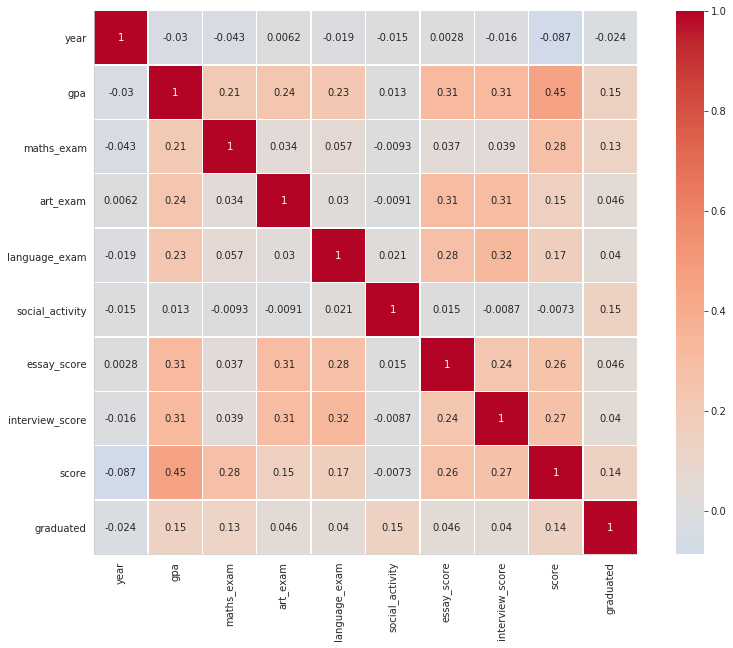

In [13]:
corr = students.corr()
grid = sns.heatmap(corr, center=0, square=True, linewidths=.3, annot=True, cmap='coolwarm')
sns.despine()
grid.figure.set_size_inches(14,10)
plt.show()

A few notes:
1. The strongest correlation is between the GPA and the score, but this is probably just an indicator that whatever the score formula, the GPA was a major contributor to it.
2. There is no strong correlation between any of the scores and one's graduation status, but there's a weak correlation (>0.1) between the graduation status and the GPA, Maths exam score, social activity score and the total score, respectively. This suggests that these factors might be the best predictors of one's graduation status (but not necessarily great).
3. There's a moderately weak (~0.3) correlation between the arts and language exam scores and the interview and essay scores, while there is pretty much no ~(0.0) correlation between the Maths exam score and the interview and essay scores. This may suggest that these two assessment forms favour those who are better at arts and languages (more outspoken and creative, perhaps?) to those who are good at Maths. (Of course, one can be good at all of them, but it's fairly rare.)
4. There's also a moderately weak (~0.3) correlation between the GPA and the essay and interview scores, but it's hard to elaborate on that further without knowing what exactly the candidates where graded on. If the essay and the interview pertained to some general knowledge, then having a higher GPA would suggest that a person has broader general knowledge which makes them more successful at such tasks -- but without any example exam / interview questions this is just a guess.

## Building a prediction model

The problem of deciding whether someone would or would not graduate is a binary classification problem. I'd like to explore a few different models as each of them has their benefits and drawbacks, and each of them will give us a slightly different set of results.

### Building a logistic regression model

The first model I'm going to use to try to fit the data uses logistic regression.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(students.drop(['graduated'],axis=1), 
                                                    students['graduated'], test_size=0.30, 
                                                    random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver = 'lbfgs')
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
predictions = logmodel.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(confusion_matrix(y_test, predictions))

[[  82  579]
 [  82 1360]]


In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.50      0.12      0.20       661
        True       0.70      0.94      0.80      1442

    accuracy                           0.69      2103
   macro avg       0.60      0.53      0.50      2103
weighted avg       0.64      0.69      0.61      2103



A few comments on the results:
1. Out of 2103 test data samples 1360 have been classified correctly as "would-be graduates", 82 have been classified correctly as "would-not-be graduates", 579 have been classified incorrectly as "would-be graduates", and 82 have been classified incorrectly as "would-not-be graduates". Thus, 70% of the selected elements are relevant, and 94 percent of the relevant elements have been selected.
2. This result is so-so. If we want to maximise the number of graduating students, we have to make live with the fact that we might not accept some perfectly capable students who have been classified as would-not-be-graduates (more on that in the limitations section). Since there's usually a trade-off between precision and recall, in this case it would be more desirable to drop our True recall value and get a higher True precision value instead.

At this point I've tried using a MinMaxScaler to to transform the data but it had no significant effect on the data:

In [49]:
students_min_max = students.copy()
to_minxmax = list(students.columns[1:-2])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
students_min_max[to_minxmax] = scaler.fit_transform(students_min_max[to_minxmax])
students_min_max.head()

,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,graduated
0,1980,0.880627,0.897779,0.979038,0.937567,0.75,0.991499,0.999606,857,False
1,1980,0.556880,0.993012,0.950690,0.762352,1.00,0.996854,0.949715,841,True
2,1980,0.486886,0.715891,0.941578,0.486223,0.75,0.980918,0.912066,811,True
3,1980,0.976020,0.952944,0.981169,0.914280,0.00,0.999492,0.997128,875,False
4,1980,0.972028,0.447179,0.952735,0.974492,0.75,0.940796,0.972949,790,True


In [50]:
X_train, X_test, y_train, y_test = train_test_split(students_min_max.drop('graduated',axis=1), 
                                                    students_min_max['graduated'], test_size=0.30, 
                                                    random_state=42)
logmodel = LogisticRegression(solver = 'lbfgs')
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [51]:
print(confusion_matrix(y_test, predictions))

[[  88  573]
 [  87 1355]]


In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.50      0.13      0.21       661
        True       0.70      0.94      0.80      1442

    accuracy                           0.69      2103
   macro avg       0.60      0.54      0.51      2103
weighted avg       0.64      0.69      0.62      2103



Finally, a note on using PCA:

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_train)

train_scaled = pca.transform(X_train)
test_scaled = pca.transform(X_test)

logmodel = LogisticRegression(solver = 'lbfgs')
logmodel.fit(train_scaled, y_train)
predictions = logmodel.predict(test_scaled)

In [19]:
print(confusion_matrix(y_test, predictions))

[[  14  647]
 [  17 1425]]


In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.45      0.02      0.04       661
        True       0.69      0.99      0.81      1442

    accuracy                           0.68      2103
   macro avg       0.57      0.50      0.43      2103
weighted avg       0.61      0.68      0.57      2103



### Building a decision tree

Another model I tried out was a decision tree. The strength of the decision tree lies in the fact that it can be visualized to show what decisions have been "made" by the algorithm.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
X_train, X_test, y_train, y_test = train_test_split(students.drop('graduated',axis=1), 
                                                    students['graduated'], test_size=0.30, 
                                                    random_state=42)

In [13]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

       False       0.34      0.36      0.35       661
        True       0.70      0.67      0.68      1442

    accuracy                           0.58      2103
   macro avg       0.52      0.52      0.52      2103
weighted avg       0.58      0.58      0.58      2103

[[240 421]
 [472 970]]


This model has a slightly (but only slightly) higher True precision value but it also has a much lower recall, so as a result it actually "allows in" much fewer (~30%) would-be graduates than the logit model. The trade-off between precision and recall is not favourable here.

Let's try to visualize the decision tree.

In [15]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image  
import pydotplus

In [16]:
features = list(students.columns[:-1])
graph = tree.export_graphviz(dtree, out_file=None, feature_names=features, class_names=['would-grad', 'would-not-grad'], filled = True)

In [17]:
graph = pydotplus.graph_from_dot_data(graph)  
graph.write_png("tree.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.431866 to fit



True

In [49]:
dtree.feature_importances_

array([0.06735431, 0.14697485, 0.11744229, 0.12105825, 0.1264251 ,
       0.03865291, 0.12034077, 0.13085432, 0.13089719])

The decision tree turned out to be so big that putting it into a notebook would break it, so it's been exported to a png file and can be found in the root folder. All things considered, it seems like a decision tree might not be the way to go here, or at least it might require some serious reduction parameter-wise.

To cut on the tree size let's try to change the maximum tree depth. For starters, let's iterate over the depths from 5 to 15 and see which gives us the best results:

In [18]:
for i in list(range(2,16)):
    dtree_max = DecisionTreeClassifier(max_depth=i)
    dtree_max.fit(X_train,y_train)
    predictions = dtree_max.predict(X_test)
    print('Results for the decision tree with the max depth set to {i}'.format(i=i))
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))

Results for the decision tree with the max depth set to 2
              precision    recall  f1-score   support

       False       0.50      0.04      0.08       661
        True       0.69      0.98      0.81      1442

    accuracy                           0.69      2103
   macro avg       0.60      0.51      0.44      2103
weighted avg       0.63      0.69      0.58      2103

[[  27  634]
 [  27 1415]]
Results for the decision tree with the max depth set to 3
              precision    recall  f1-score   support

       False       0.46      0.11      0.18       661
        True       0.70      0.94      0.80      1442

    accuracy                           0.68      2103
   macro avg       0.58      0.53      0.49      2103
weighted avg       0.62      0.68      0.60      2103

[[  72  589]
 [  84 1358]]
Results for the decision tree with the max depth set to 4
              precision    recall  f1-score   support

       False       0.51      0.10      0.16       661
        T

Interestingly, with the max depth set to 2 the accuracy matched that of a logistic regression classifier. Let's visualize the tree to better understand how it worked out:

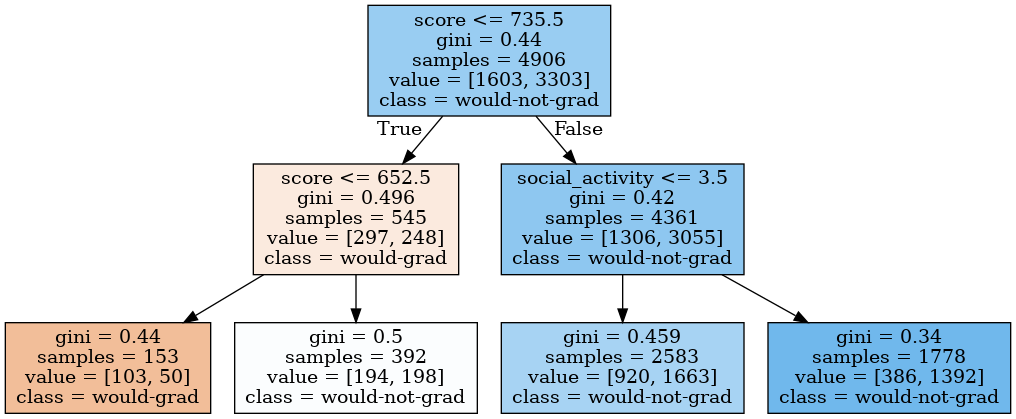

In [20]:
dtree_2 = DecisionTreeClassifier(max_depth=2)
dtree_2.fit(X_train,y_train)
predictions = dtree_2.predict(X_test)
features = list(students.columns[:-1])
graph_dtree_2 = tree.export_graphviz(dtree_2, out_file=None, feature_names=features, class_names=['would-grad', 'would-not-grad'], filled = True)
graph_dtree_2 = pydotplus.graph_from_dot_data(graph_dtree_2)  
Image(graph_dtree_2.create_png())

In [48]:
dtree_2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.38388075, 0.        , 0.        , 0.61611925])

This tree is much easier to interpret! For this model only the score and social activity were of any importance. But note that its accuracy isn't much of an improvement compared to the original selection method.

Let's see if applying a random forest classifier would help. Again, let's try to iterate over several depth levels to uncover the best solution (the estimator number corresponds to the number of trees in the forest):

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
for i in list(range(2,16)):
    rfc = RandomForestClassifier(n_estimators=100, max_depth=i)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    print('Results for the decision tree with the max depth set to {i}'.format(i=i))
    print(confusion_matrix(y_test,rfc_pred))
    print(classification_report(y_test,rfc_pred))

Results for the decision tree with the max depth set to 2
[[  24  637]
 [  15 1427]]
              precision    recall  f1-score   support

       False       0.62      0.04      0.07       661
        True       0.69      0.99      0.81      1442

    accuracy                           0.69      2103
   macro avg       0.65      0.51      0.44      2103
weighted avg       0.67      0.69      0.58      2103

Results for the decision tree with the max depth set to 3
[[  47  614]
 [  44 1398]]
              precision    recall  f1-score   support

       False       0.52      0.07      0.12       661
        True       0.69      0.97      0.81      1442

    accuracy                           0.69      2103
   macro avg       0.61      0.52      0.47      2103
weighted avg       0.64      0.69      0.59      2103

Results for the decision tree with the max depth set to 4
[[  60  601]
 [  48 1394]]
              precision    recall  f1-score   support

       False       0.56      0.09   

Again, although the random forest with just 2 depth levels looks like the winner (the score has not improved, though), what is chosen in the end depends on what we'd want to optimize for.

### SVM

The final model I wanted to test out on the data was the support-vector machine. It can be used for both supervised and unsupervised machine learning; in this case, since there's information about the graduation status it can be used as a supervised learning model to group the results. 

In [31]:
from sklearn.svm import SVC

In [60]:
model = SVC(gamma='scale')

In [61]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
predictions = model.predict(X_test)

In [63]:
print(confusion_matrix(y_test,predictions))

[[   0  661]
 [   0 1442]]


In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       661
        True       0.69      1.00      0.81      1442

    accuracy                           0.69      2103
   macro avg       0.34      0.50      0.41      2103
weighted avg       0.47      0.69      0.56      2103



/home/mkay313/Projects/uni-student-recommendation/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mkay313/Projects/uni-student-recommendation/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mkay313/Projects/uni-student-recommendation/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Whoops. The model put everything into a single class. At this point I could either normalize the data or try brute-forcing for better parameters. Since I already tried normalizing the data for LR and it did nothing for me, I'm going to give just brute-forcing the parameters a shot:

In [65]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [68]:
grid.fit(X_train, y_train)

/home/mkay313/Projects/uni-student-recommendation/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.673, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.673, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.673, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.673, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.673, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.673, total=   0.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.673, total=   0.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.673, total=   0.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.673, total=   0.7s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.635, total=   0.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.639, total=   0.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.661, total=   0.7s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.593, total=   1.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.578, total=   1.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.592, total=   1.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.605, total=  10.8s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [69]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [70]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
grid_predictions = grid.predict(X_test)

In [72]:
print(confusion_matrix(y_test,grid_predictions))

[[  47  614]
 [  48 1394]]


In [73]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

       False       0.49      0.07      0.12       661
        True       0.69      0.97      0.81      1442

    accuracy                           0.69      2103
   macro avg       0.59      0.52      0.47      2103
weighted avg       0.63      0.69      0.59      2103



Aaaand it didn't help at all.

### Summary and limitations

As I've stated at the beginning, I don't think that predicting somebody's graduation status based off their performance before they even started studying makes much sense, as there are too many external factors that come into play and might cause someone to not graduate:
- bad education decisions ("I don't want to be a doctor, it's just my family")
- health issues
- family issues
- socioeconomic status
- etc.

That being said, the models I prepared get up to 69% accuracy on the provided dataset (which makes them slightly better than a coin toss, though not much). There are still a few avenues I'd have gone into had I had enough time:
- trying to uncouple the variables: many of the variables correlate better with each other than with the graduation status. Simply normalizing the data (either with min-max or a logarithmic scale) had no significant effect on the data, and with PCA I got an even better recall score but my precision was still at 0.69.
- preparing a neural network model, because why not.

Overall, I'm both disappointed and relieved by the results -- they're pretty bad but, as I've said, I don't think it's possible to get very good results without some form of abuse here. Abuse in this context would mean e.g. minimising the false positives (assessed as to-be graduates but never graduated) by not admitting anyone who shows any sign of potential dropout. Never do this, it'd be a [Weapon of Math Destruction](https://en.wikipedia.org/wiki/Weapons_of_Math_Destruction).

Thank you for your attention!